In [418]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [419]:
# Importing and Exploration of the dataset
data = pd.read_csv("C:/Users/Rezaei/Desktop/used_cars.csv")
data = pd.DataFrame(data)
# showing the first 5 rows of the dataset
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [420]:
# To check the Dimensions of the dataset
data.shape

(8128, 13)

In [421]:
# checking the count and name of the columns
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [422]:
# Checking the datatypes of the columns
data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [423]:
# Checking the unique of the data
data.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [424]:
# Checking the info of the data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [425]:
# to check for missing values
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [426]:
# delete all missing values
data2 = data.dropna()
data2.shape

(7906, 13)

In [427]:
# function for separate of informations of torque columns
def change_torque():
    
    # we split torque n.m with regex pattern
    torque_nm =  [re.search(r"(\d+(?:\.\d+)?)", str(x)) for x in data2['torque']]
    
    # we add torque n.m to a empty list
    list1 = []
    for item in torque_nm:
        list1.append(item.group())
    
    # to convert torque n.m list to dataframe
    new_torque = pd.DataFrame(list1, columns=['torque_NM'])
    
    
    
    # we split unit of torque n.m with regex pattern
    nm_kgm =  [re.search(r"nm|Nm|NM|KGM|Kgm|kgm", str(x)) for x in data2['torque']]

    # we add unit of torque n.m to a empty list
    list2 = []
    for item in nm_kgm:
        if item != None:
            list2.append(item.group())
        else:
            list2.append('nm')
    
    # to convert unit of torque n.m list to dataframe
    new_nm_kgm = pd.DataFrame(list2, columns=['nm_kgm'])
    
    
    # we split minimum of torque rpm with regex pattern
    torque_min =  [re.search(r"(\d+(?:\.\d+)?)[^\d]+((\d+(?:\,\d+)?))", str(x)) for x in data2['torque']]

    # we add minimum of torque rpm to a empty list
    list3 = []
    for item in torque_min:
        if item != None:
            list3.append(item.group(2))
        else:
            list3.append('NaN')
    
    # to convert minimum of torque rpm list to dataframe
    new_torque_min = pd.DataFrame(list3, columns=['torque_MIN'])
    
    
    
    # we split minimum and maximum of torque rpm with regex pattern
    torque_max =  [re.search(r"((\d+(?:\,\d+)?))(-|~)((\d+(?:\,\d+)?))", str(x)) for x in data2['torque']]
 
    # we add minimum and maximum of torque rpm to a empty list
    list4 = []
    for item in torque_max:
        if item != None:
            list4.append(item.group())
        else:
            list4.append('NaN')
    
    # to convert minimum and maximum of torque rpm list to dataframe
    new_torque_max = pd.DataFrame(list4, columns=['torque_MAX'])


    # insert all dataframes to one dataframe
    new_torque.insert(1, 'nm_kgm', new_nm_kgm['nm_kgm'], True)
    new_torque.insert(2, 'torque_MIN', new_torque_min['torque_MIN'], True)
    new_torque.insert(3, 'torque_MAX', new_torque_max['torque_MAX'], True) 
    new_torque['torque_NM'] = new_torque['torque_NM'].astype(str).astype(float)
    return new_torque
    

def mean(new_data):
    
    # to separate minimum and maximum of torque from each other
    new = new_data['torque_MAX'].str.split('-|~',expand=True)
    new[0] = new[0].str.split(',')
    new[0] = new[0].str.join('')
    new[1] = new[1].str.split(',')
    new[1] = new[1].str.join('')
    
    # to replace None to nan
    new[0] = new[0].replace({'None':''},regex=True)
    new[0] = new[0].replace({'':np.nan})
    new[0] = new[0].astype(float)

    new[1] = new[1].replace({'None':''},regex=True)
    new[1] = new[1].replace({'':np.nan})
    new[1] = new[1].astype(float)
 
    # to calculate mean of nimimum and maximum of torque rpm and put in one column
    torque_mean = (new[0]+new[1]) /2
    torque_mean = pd.DataFrame(torque_mean)
    return torque_mean

# recall functions
new_data = change_torque() 
torque_mean = mean(new_data)

# to change torque min column from object to float 
new_data['torque_MIN'] = new_data['torque_MIN'].str.split(',')
new_data['torque_MIN'] = new_data['torque_MIN'].str.join('')
new_data['torque_MIN'] = new_data['torque_MIN'].astype(str).astype(float)
    

# we change unit of torque n.m column from kgm to nm by multiplying by 9.8    
for item in range(new_data.shape[0]):
    if new_data.loc[item,'nm_kgm'] == 'kgm':
        new_data.loc[item,'torque_NM'] *= 9.8
    if new_data.loc[item,'nm_kgm'] == 'Kgm':
        new_data.loc[item,'torque_NM'] *= 9.8
    if new_data.loc[item,'nm_kgm'] == 'KGM':
        new_data.loc[item,'torque_NM'] *= 9.8 
            
            
new_data.drop('nm_kgm',axis=1,inplace= True) 
new_data.insert(3, 'torque_eng_rpm',  torque_mean[0], True)
new_data.torque_eng_rpm.fillna(new_data['torque_MIN'], inplace=True)
new_data.drop('torque_MIN',axis=1,inplace= True)
new_data.drop('torque_MAX',axis=1,inplace= True)        
new_data.fillna(new_data['torque_eng_rpm'].mean(), inplace=True)
new_data
 

,torque_NM,torque_eng_rpm
0,190.00,2000.0
1,250.00,2000.0
2,124.46,2700.0
3,219.52,2250.0
4,112.70,4500.0
...,...,...
7901,113.70,4000.0
7902,235.20,2325.0
7903,190.00,2000.0
7904,140.00,2400.0


In [428]:
# drop torque column and insert torque_NM and torque_eng_rpm culmns to data
data2.drop('torque',axis=1,inplace= True)
data2.reset_index(drop=True, inplace=True)
data2.insert(11,'torque_NM',  new_data['torque_NM'], True)
data2.insert(12,'torque_eng_rpm',  new_data['torque_eng_rpm'], True)
data2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque_NM,torque_eng_rpm,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190.00,2000.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250.00,2000.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,124.46,2700.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,219.52,2250.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,112.70,4500.0,5.0


In [429]:
# splitting the unit of data and Converting the data types of columns
new1 = data2['mileage'].str.split(" ", n=1, expand=True)
data2['mileage'] = new1[0].astype(str).astype(float)

new2 = data2['engine'].str.split(" ", n=1, expand=True)
data2['engine'] = new2[0].astype(str).astype(float)

new3 = data2['max_power'].str.split(" ", n=1, expand=True)
data2['max_power'] = new3[0].astype(str).astype(float)
data2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque_NM,torque_eng_rpm,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,2000.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,2000.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.46,2700.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.52,2250.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.70,4500.0,5.0


In [430]:
# Summary Statistics of the data
data2.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque_NM,torque_eng_rpm,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,180.593327,2888.887513,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,109.225284,990.422184,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,47.040000,11.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,111.800000,2000.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,170.000000,2400.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,209.000000,4000.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1862.000000,21800.000000,14.000000


In [431]:
# Summary non numeric of the data
data2.describe(include="object")

,name,fuel,seller_type,transmission,owner
count,7906,7906,7906,7906,7906
unique,1982,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,129,4299,6563,6865,5215


In [432]:
# to check for duplicate values
data2.duplicated().sum()

1189

In [433]:
# delete duplicate values
data3 = data2.drop_duplicates(inplace=False)
data3.shape

(6717, 14)

In [434]:
# encode the data
le = LabelEncoder()
data3['fuel'] = le.fit_transform(data3['fuel'])
data3['name'] = le.fit_transform(data3['name'])
data3['seller_type'] = le.fit_transform(data3['seller_type'])
data3['transmission'] = le.fit_transform(data3['transmission'])
data3['owner'] = le.fit_transform(data3['owner'])
data3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque_NM,torque_eng_rpm,seats
0,1249,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,190.00,2000.0,5.0
1,1546,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,250.00,2000.0,5.0
2,375,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,124.46,2700.0,5.0
3,743,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,219.52,2250.0,5.0
4,1290,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,112.70,4500.0,5.0


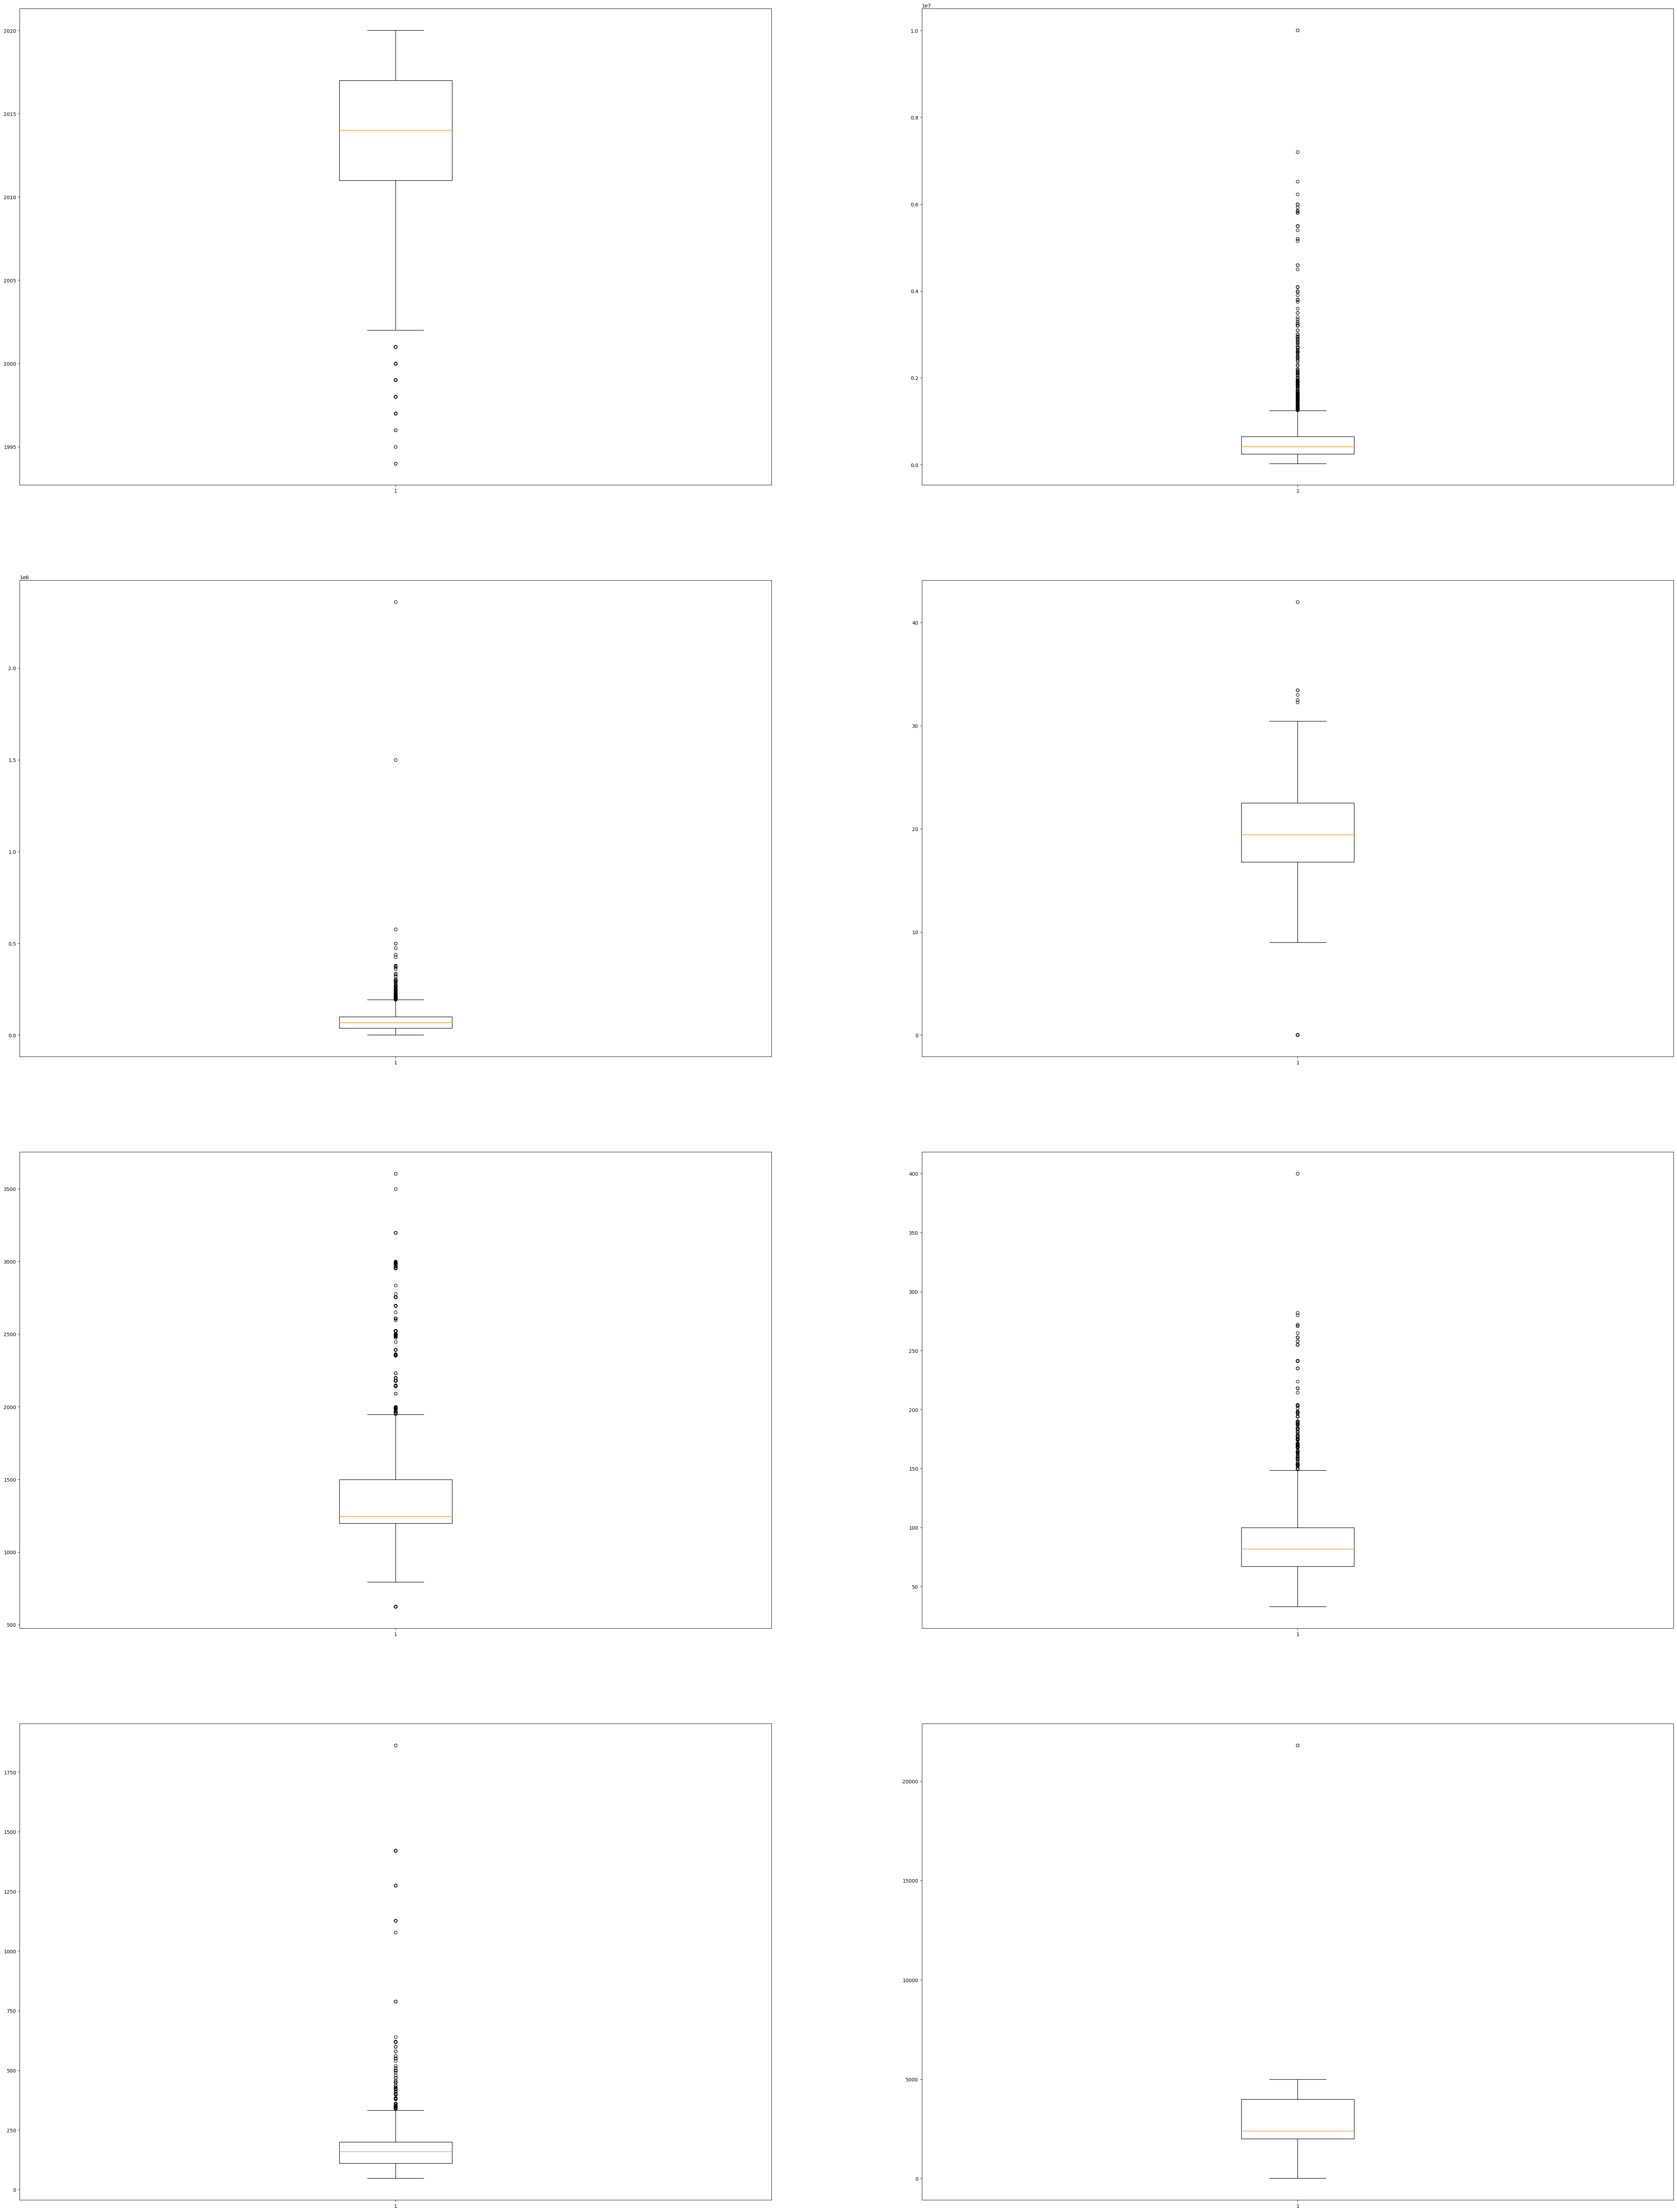

In [435]:
# box plot for columns
fig, axes = plt.subplots(4,2,figsize=(6*10,4*20))
axes[0,0].boxplot(data3['year'])
axes[0,1].boxplot(data3['selling_price'])
axes[1,0].boxplot(data3['km_driven'])
axes[1,1].boxplot(data3['mileage'])
axes[2,0].boxplot(data3['engine'])
axes[2,1].boxplot(data3['max_power'])
axes[3,0].boxplot(data3['torque_NM'])
axes[3,1].boxplot(data3['torque_eng_rpm'])
plt.show()

In [436]:
# remove outlier
data4 = data3[data3['selling_price'] < 10000000]
data5 = data4[data4['km_driven'] < 1500000]
data6 = data5[data5['max_power'] < 400]
data7 = data6[data6['torque_eng_rpm'] < 20000]
data7

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque_NM,torque_eng_rpm,seats
0,1249,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,190.00,2000.0,5.0
1,1546,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,250.00,2000.0,5.0
2,375,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,124.46,2700.0,5.0
3,743,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,219.52,2250.0,5.0
4,1290,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,112.70,4500.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,1350,2013,260000,50000,3,1,1,2,18.90,998.0,67.10,90.00,3500.0,5.0
7900,735,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,219.70,2125.0,5.0
7901,733,2013,320000,110000,3,1,1,0,18.50,1197.0,82.85,113.70,4000.0,5.0
7902,618,2007,135000,119000,1,1,1,1,16.80,1493.0,110.00,235.20,2325.0,5.0


<Axes: >

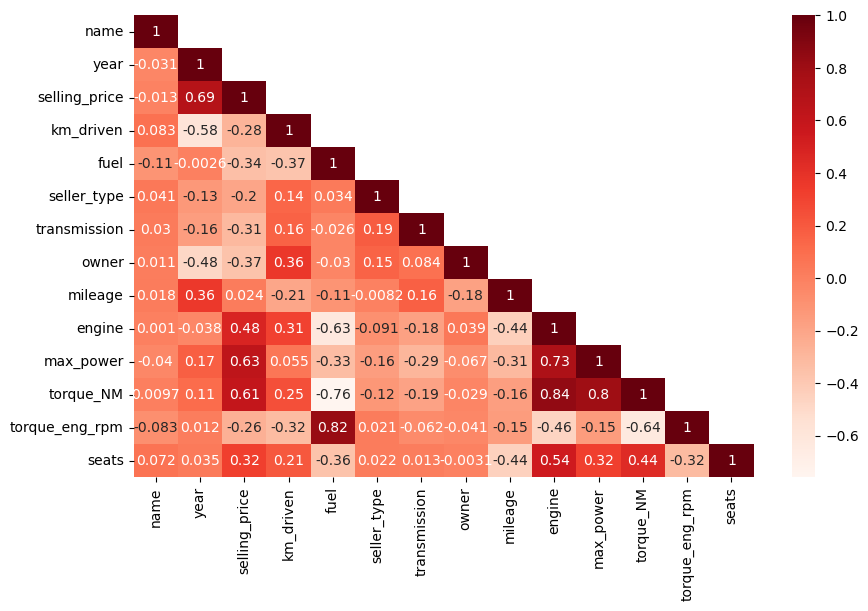

In [437]:
# we plot heatmap
corr = data7.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10,6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
sns.heatmap(corr,cmap='Reds',mask=mask, annot= True, ax=ax)

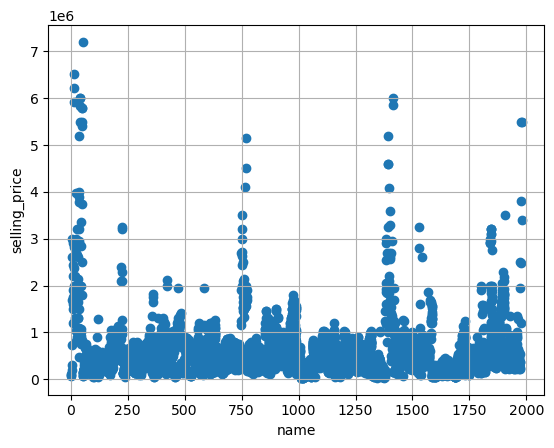

In [438]:
# we plot scatter for name and selling price
plt.scatter(data7['name'],data7['selling_price'])
plt.xlabel('name')
plt.ylabel('selling_price')
plt.grid()
plt.show()

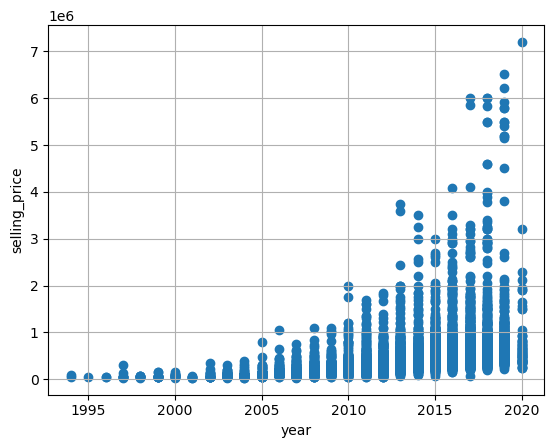

In [439]:
# we plot scatter for year and selling price
plt.scatter(data7['year'],data7['selling_price'])
plt.xlabel('year')
plt.ylabel('selling_price')
plt.grid()
plt.show()

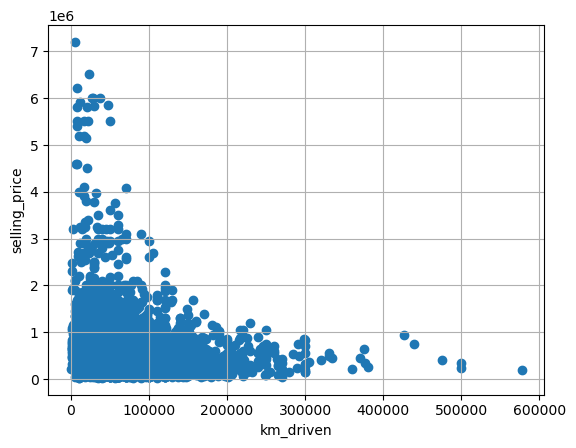

In [440]:
# we plot scatter for km driven and selling price
plt.scatter(data7['km_driven'],data7['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.grid()
plt.show()

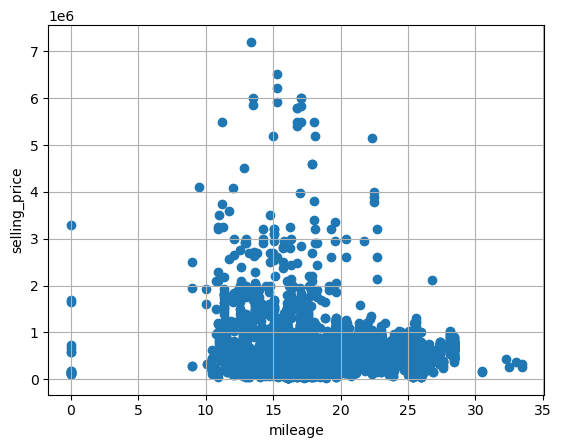

In [441]:
# we plot scatter for mileage and selling price
plt.scatter(data7['mileage'],data7['selling_price'])
plt.xlabel('mileage')
plt.ylabel('selling_price')
plt.grid()
plt.show()

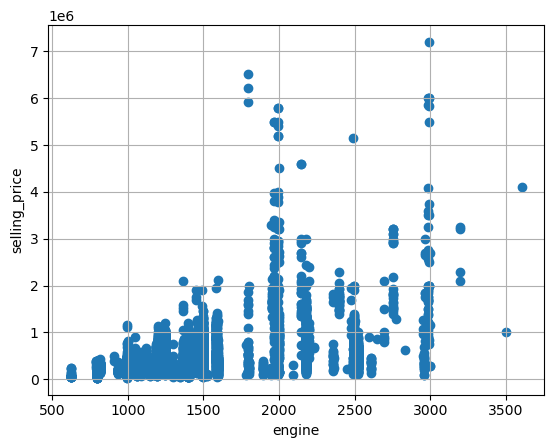

In [442]:
# we plot scatter for engine and selling price
plt.scatter(data7['engine'],data7['selling_price'])
plt.xlabel('engine')
plt.ylabel('selling_price')
plt.grid()
plt.show()

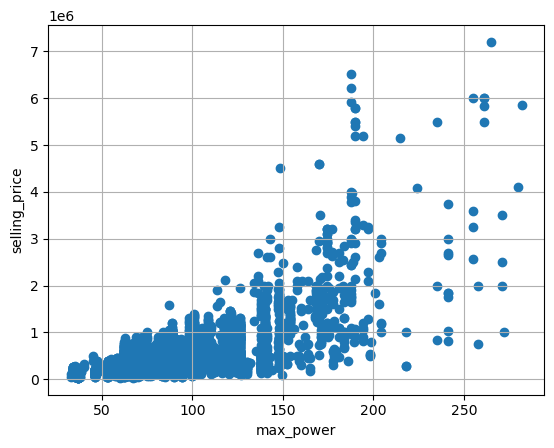

In [443]:
# we plot scatter for max power and selling price
plt.scatter(data7['max_power'],data7['selling_price'])
plt.xlabel('max_power')
plt.ylabel('selling_price')
plt.grid()
plt.show()

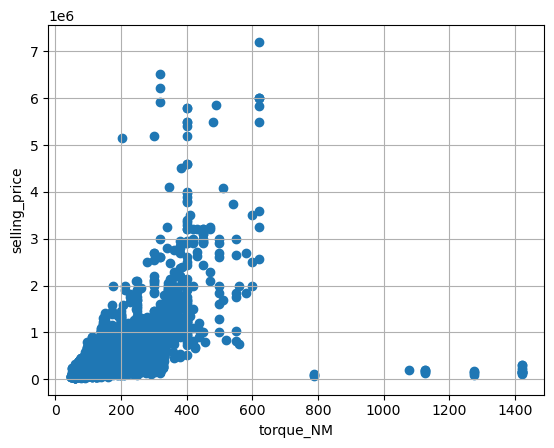

In [444]:
# we plot scatter for torque nm and selling price
plt.scatter(data7['torque_NM'],data7['selling_price'])
plt.xlabel('torque_NM')
plt.ylabel('selling_price')
plt.grid()
plt.show()

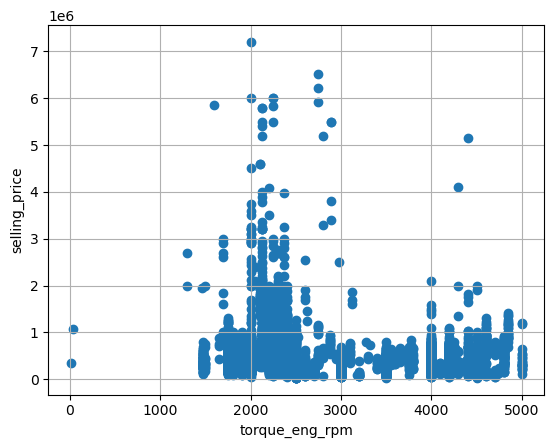

In [445]:
# we plot scatter for torque_eng_rpm and selling price
plt.scatter(data7['torque_eng_rpm'],data7['selling_price'])
plt.xlabel('torque_eng_rpm')
plt.ylabel('selling_price')
plt.grid()
plt.show()

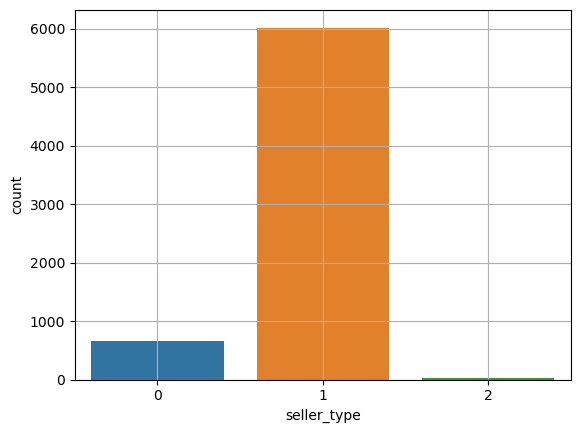

In [446]:
# we plot countplot for seeller type
sns.countplot(x='seller_type', data=data7)
plt.xlabel('seller_type')
plt.ylabel('count')
plt.grid()
plt.show()

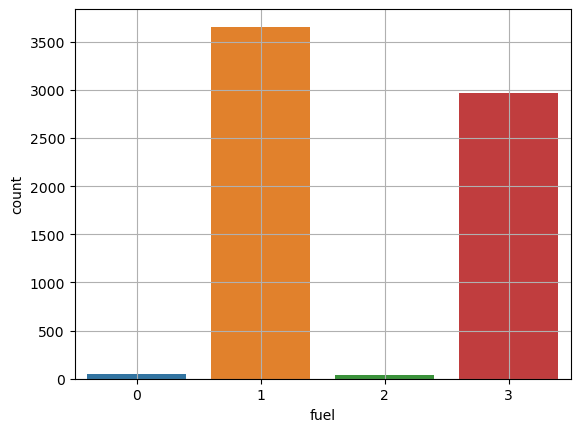

In [447]:
# we plot countplot for fuel
sns.countplot(x='fuel', data=data7)
plt.xlabel('fuel')
plt.ylabel('count')
plt.grid()
plt.show()

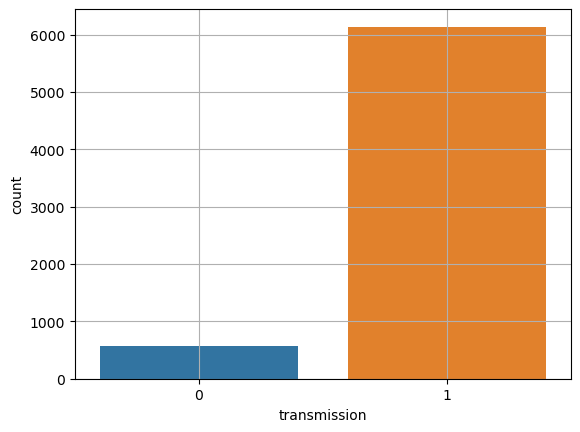

In [448]:
# we plot countplot for transmission
sns.countplot(x='transmission', data=data7)
plt.xlabel('transmission')
plt.ylabel('count')
plt.grid()
plt.show()

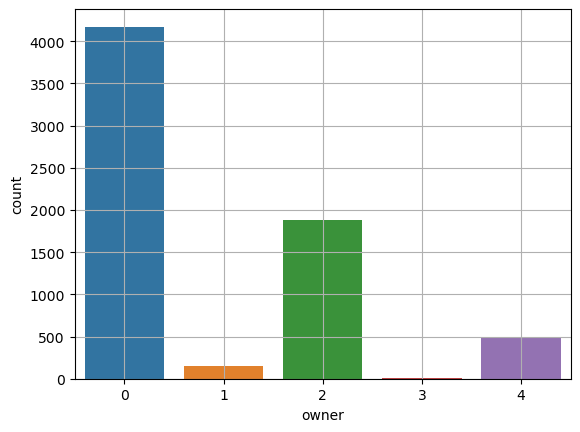

In [449]:
# we plot countplot for owner
sns.countplot(x='owner', data=data7)
plt.xlabel('owner')
plt.ylabel('count')
plt.grid()
plt.show()

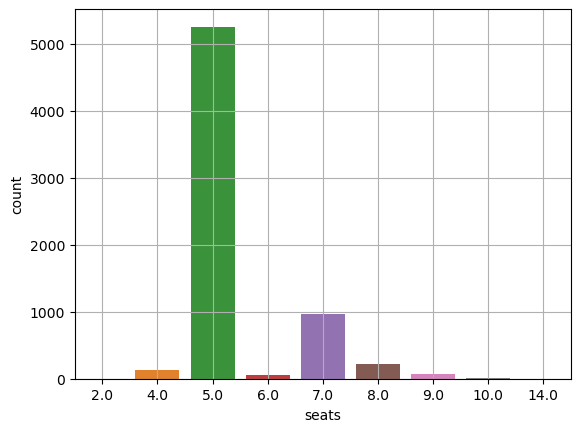

In [450]:
# we plot countplot for seats
sns.countplot(x='seats',data=data7)
plt.xlabel('seats')
plt.ylabel('count')
plt.grid()
plt.show()

In [451]:
# we split data to train and test
y = data7['selling_price']
X = data7.drop('selling_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5370, 13), (1343, 13), (5370,), (1343,))

In [452]:
# single linear rigression
y = data7[['selling_price']]
X = data7[['max_power']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}")
print(f"r2: {r2}")

mse: 141374901368.18088
r2: 0.4750874709340872


In [453]:
# multi variable linear regression
y = data7[['selling_price']]
X = data7.drop('selling_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}")
print(f"r2: {r2}")

mse: 96917276168.90822
r2: 0.640154708850951


In [454]:
# polynomial regression
y = data7[['selling_price']]
X = data7.drop('selling_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)
model.fit(X_train_poly, y_train)
r2 = model.score(X_test_poly, y_test)

print(f"r2: {r2}")

r2: 0.8239269968724069


In [455]:
# ridge regression
y = data7[['selling_price']]
X = data7.drop('selling_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ridge = Ridge(alpha=0.2)
ridge.fit(X_train, y_train)

ridge.coef_
for i, col in enumerate(X_train.columns):
    print(f"Ridge model coefficients for {col} => \t\t {ridge.coef_[0][i]}")

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model coefficients for name => 		 -6.803524619447684
Ridge model coefficients for year => 		 36093.634115156085
Ridge model coefficients for km_driven => 		 -1.1267354921876755
Ridge model coefficients for fuel => 		 51617.089130520435
Ridge model coefficients for seller_type => 		 -113510.58455919975
Ridge model coefficients for transmission => 		 -303726.77960307634
Ridge model coefficients for owner => 		 -13963.84376722141
Ridge model coefficients for mileage => 		 706.7410480664644
Ridge model coefficients for engine => 		 102.87441811048006
Ridge model coefficients for max_power => 		 7945.882644877324
Ridge model coefficients for torque_NM => 		 83.94713467610423
Ridge model coefficients for torque_eng_rpm => 		 -115.17543617375777
Ridge model coefficients for seats => 		 -20640.139471564755
0.6406486951874871
0.6401544159430166


In [456]:
# we find hyper parameters with randomized search cv and r2 scoring
params = {'alpha':[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

random_search=RandomizedSearchCV(estimator=ridge, param_distributions=params, scoring='r2', cv=5, n_iter=3)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best R2 Score: ", random_search.best_score_)

Best Parameters:  {'alpha': 0.6}
Best R2 Score:  0.6371071095859777


In [457]:
# we find hyper parameters with randomized search cv and mean squered error scoring
params = {'alpha':[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

random_search=RandomizedSearchCV(estimator=ridge, param_distributions=params, scoring='neg_mean_squared_error', cv=5, n_iter=3)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best mean squered error: ", random_search.best_score_)

Best Parameters:  {'alpha': 1}
Best mean squered error:  -93520998684.00064


In [458]:
# lasso regression
y = data7[['selling_price']]
X = data7.drop('selling_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

for i, col in enumerate(X_train.columns):
    print(f"Ridge model coefficients for {col} => \t\t {lasso.coef_[i]}")

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

Ridge model coefficients for name => 		 -6.804613833578153
Ridge model coefficients for year => 		 36093.10757757821
Ridge model coefficients for km_driven => 		 -1.1266000269063574
Ridge model coefficients for fuel => 		 51617.09223465357
Ridge model coefficients for seller_type => 		 -113545.86001579984
Ridge model coefficients for transmission => 		 -303917.2211826352
Ridge model coefficients for owner => 		 -13962.440927550419
Ridge model coefficients for mileage => 		 707.9967283906798
Ridge model coefficients for engine => 		 102.87516847822619
Ridge model coefficients for max_power => 		 7945.0304813337425
Ridge model coefficients for torque_NM => 		 83.96412258362903
Ridge model coefficients for torque_eng_rpm => 		 -115.17706651920054
Ridge model coefficients for seats => 		 -20633.312481904708
0.6406487041479725
0.6401547142084609


In [459]:
# we find hyper parameters with randomized search cv and r2 scoring
params = {'alpha':[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

random_search=RandomizedSearchCV(estimator=lasso, param_distributions=params, scoring='r2', cv=5, n_iter=3)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best R2 Score: ", random_search.best_score_)

Best Parameters:  {'alpha': 0.7}
Best R2 Score:  0.637105337608949


In [460]:
# we find hyper parameters with randomized search cv and mean squered error scoring
params = {'alpha':[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

random_search=RandomizedSearchCV(estimator=lasso, param_distributions=params, scoring='neg_mean_squared_error', cv=5, n_iter=3)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best mean squered error: ", random_search.best_score_)

Best Parameters:  {'alpha': 0.8}
Best mean squered error:  -93521556915.30179


In [461]:
# elastic net regression
y = data7[['selling_price']]
X = data7.drop('selling_price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

elastic = ElasticNet(alpha=0.5, l1_ratio=0.2)
elastic.fit(X_train, y_train)

print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))

0.6196044460202853
0.6158813963586178


In [462]:
# we find hyper parameters with randomized search cv and r2 scoring
params = {'alpha':[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
         'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

random_search=RandomizedSearchCV(estimator=elastic, param_distributions=params, scoring='r2', cv=5, n_iter=3)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best R2 Score: ", random_search.best_score_)

Best Parameters:  {'l1_ratio': 0.9, 'alpha': 0.0001}
Best R2 Score:  0.6371054123336376


In [463]:
# we find hyper parameters with randomized search cv and mean squered error scoring
params = {'alpha':[1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
         'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

random_search=RandomizedSearchCV(estimator=elastic, param_distributions=params, scoring='neg_mean_squared_error', cv=5, n_iter=3)
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best mean squered error: ", random_search.best_score_)

Best Parameters:  {'l1_ratio': 0.7, 'alpha': 0.01}
Best mean squered error:  -93527254828.88948
